# Customizing long range channels by Napari

In this tutorial, we will give an example to show how to customize long-range channels by using Napari, an interactive tool. Since Napari is difficult to use in Linux, we recommend doing this in macOS.

## Installation

First, we need to install the squidpy package with Napari by using `pip install 'squidpy[interactive]'` in your environment.

:::{seealso}
For basic usage of Napari, please see [Squidpy document](https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_napari.html#annotate-tissue-regions-with-the-shape-layer) 
:::

## Usage

In [1]:
# Importing packages
import os
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import seaborn as sns
import matplotlib.pyplot as plt

import metachat as mc

In [2]:
# Setting your work dictionary
os.chdir("/Users/songhaoluo/Library/CloudStorage/OneDrive-UCIrvine/2_Unpublished_work/1_Metabolite_Chat/4_Codes/test/multi-omics_mouseBrainParkinson")

For spatial transcriptome and spatial metabolome combined data by [tutorial](https://metachat.readthedocs.io/en/latest/tutorials/realistic_data/multi-omics_data.html), we can download processed data from [zenodo](https://zenodo.org/records/12629999).

In [3]:
adata = sc.read('data/adata_combined.h5ad')
image = adata.uns['spatial']['V11L12-109_B1']['images']['hires']
img = sq.im.ImageContainer(image, library_id='V11L12-109_B1', scale=adata.uns['spatial']['V11L12-109_B1']['scalefactors']['tissue_hires_scalef'])

:::{hint}
You can check the save information of your images in `adata.uns['spatial']`. The parameter `scale` in `sq.im.ImageContainer` is very important.
:::

Next, please activate interactive interface.

In [4]:
viewer = img.interactive(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Traceback (most recent call last):
  File "/Users/songhaoluo/mambaforge/envs/metachat_env/lib/python3.9/site-packages/squidpy/pl/_interactive/_widgets.py", line 41, in <lambda>
    self.itemDoubleClicked.connect(lambda item: self._onAction((item.text(),)))
  File "/Users/songhaoluo/mambaforge/envs/metachat_env/lib/python3.9/site-packages/squidpy/pl/_interactive/_widgets.py", line 146, in _onAction
    self._controller.add_points(vec, key=item, layer_name=name)
  File "/Users/songhaoluo/mambaforge/envs/metachat_env/lib/python3.9/site-packages/squidpy/pl/_interactive/_controller.py", line 187, in add_points
    self._hide_points_controls(layer, is_categorical=is_categorical_dtype(vec))
  File "/Users/songhaoluo/mambaforge/envs/metachat_env/lib/python3.9/site-packages/squidpy/pl/_interactive/_controller.py", line 307, in _hide_points_controls
    gl: QGridLayout = points_controls.grid_layout
A

We can see a interface like this:

<img src="../../_static/image/LRC_1.png" alt="LRC_1" width="1000"/>

Click `new shapes layer`, and click `Add polygens` or `Add polygens lasso` to Select the contiguous region that you think will be the LRC. Then you change the layer name to 'LRC' and type `SHIFT + E`, you will get a observations named 'LRC_shapes'.

<img src="../../_static/image/LRC_2.png" alt="LRC_2" width="1000"/>

<img src="../../_static/image/LRC_3.png" alt="LRC_3" width="1000"/>

You can find the `LRC_shape` is ready in the `adata.obs['LRC_shapes']`.

In [5]:
adata

AnnData object with n_obs × n_vars = 3011 × 35300
    obs: 'in_tissue', 'array_row', 'array_col', 'tissue_type', 'LRC_shapes'
    var: 'features'
    uns: 'log1p', 'spatial', 'tissue_type_colors', 'LRC_shapes', 'LRC_shapes_colors'
    obsm: 'spatial'

Change the name of `adata.obs['LRC_shapes']` to `adata.obs['LRC_XXX_filtered']` for subsequent analysis, where `XXX` is the LRC name.

In [6]:
adata.obs.rename(columns={'LRC_shapes': 'LRC_CSF_filtered'}, inplace=True)

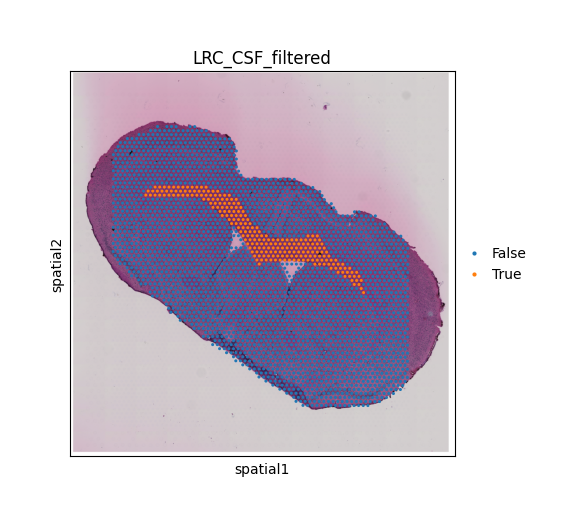

In [7]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(figsize = (6,5))
sq.pl.spatial_scatter(adata,
                      color = 'LRC_CSF_filtered',
                      alpha = 1,
                      ax = ax)
ax.set_box_aspect(1)